In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#ruta_archivo = '/content/drive/MyDrive/CS Datos Grupo 9/telco_churn_clusterai.csv'
customers_df = pd.read_csv(r'RUTA\telco_churn_clusterai.csv')

In [5]:
filas, columnas = customers_df.shape
print(f"Filas: {filas}; Columnas: {columnas}")

Filas: 7043; Columnas: 22


In [6]:
customers_df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [7]:
#borro la columna que es un indice, tambien "customerID" ya que es un campo indintificatorio por cliente tambien y no tendra relevancia
customers_df =customers_df.drop(columns=['Unnamed: 0', 'customerID'])

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6127 non-null   object 
 1   SeniorCitizen     6127 non-null   float64
 2   Partner           6127 non-null   object 
 3   Dependents        6127 non-null   object 
 4   tenure            6127 non-null   float64
 5   PhoneService      6127 non-null   object 
 6   MultipleLines     6127 non-null   object 
 7   InternetService   6127 non-null   object 
 8   OnlineSecurity    6127 non-null   object 
 9   OnlineBackup      6127 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          5846 non-null   object 
 15  PaperlessBilling  5846 non-null   object 
 16  PaymentMethod     5846 non-null   object 


In [9]:
#remplazo los espacios en blanco por nulos para poder identificarlos
customers_df.replace(' ', np.nan, inplace=True)
#vemos los valores nulos por columna
print("\nValores nulos por columna:")
customers_df.isnull().sum()


Valores nulos por columna:


gender               916
SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges          11
Churn                  0
dtype: int64

In [10]:
# Calculamos % los valores faltantes para cada una de las variables
miss = pd.DataFrame(customers_df.isnull().mean(), columns=["Missing"])
perc_miss = miss.loc[miss.Missing > 0]
perc_miss.sort_values("Missing", ascending = False)

,Missing
Contract,0.169956
PaperlessBilling,0.169956
PaymentMethod,0.169956
MonthlyCharges,0.169956
gender,0.130058
SeniorCitizen,0.130058
Partner,0.130058
Dependents,0.130058
tenure,0.130058
PhoneService,0.130058


In [11]:
#no borramos filas porque es mucha data que se pierde, entonces hacemos un tratamientop sobre los nulos, dependiendo que represente cada campo


In [12]:
print("\nEstadasticas:")
print(customers_df.describe(include='all'))


Estadasticas:
       gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    6127    6127.000000    6127       6127  6127.000000         6127   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3082            NaN    3172       4294          NaN         5527   
mean      NaN       0.161580     NaN        NaN    32.539742          NaN   
std       NaN       0.368095     NaN        NaN    24.629822          NaN   
min       NaN       0.000000     NaN        NaN     0.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    56.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBa

**texto en negrita**###

In [13]:
# Armo una lista de las columnas del tipo objeto o con "categorias", que tengan valores nulos
categorical_cols = customers_df.select_dtypes(include=['object']).isnull().any().loc[lambda x: x].index.tolist()
print(categorical_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


In [14]:
#a las columnas categorias, le imputamos la moda a los nulos
for col in categorical_cols:
    if col in customers_df.columns:
        # Imputar con la moda
        customers_df[col].fillna(customers_df[col].mode()[0], inplace=True)

In [15]:
# Armo una lista de las columnas del tipo float o numericas, que tengan valores nulos
numeric_cols= customers_df.select_dtypes(include=['float64']).isnull().any().loc[lambda x: x].index.tolist()
print(numeric_cols)


['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [16]:
#a las columnas numericoas, le imputamos la media
for col in numeric_cols:
    if col in customers_df.columns:
        customers_df[col].fillna(customers_df[col].median(), inplace=True) # la mediana es menos sensible a outliers

In [17]:
# verifico si quedan nulos
print("Valores nulos restantes luego de las imputaciones:")
print(customers_df.isnull().sum())

Valores nulos restantes luego de las imputaciones:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
print("\nEstadisticas luego tratamiento:")
print(customers_df.describe(include='all'))


Estadisticas luego tratamiento:
       gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7043    7043.000000    7043       7043  7043.000000         7043   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3998            NaN    4088       5210          NaN         6443   
mean      NaN       0.140565     NaN        NaN    32.079370          NaN   
std       NaN       0.347597     NaN        NaN    23.002996          NaN   
min       NaN       0.000000     NaN        NaN     0.000000          NaN   
25%       NaN       0.000000     NaN        NaN    11.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    52.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService Onlin

# Seleccion y trabajo de features con los que vamos a trabajar

In [19]:
# Evaluo los valores de las columnas; observo que hay columnas donde se podria remplazar el "No tiene servicio" por un simple "No"

for col in customers_df.columns:
    unique_values = customers_df[col].unique()
    print(f"{col}: {unique_values}")

gender: ['Female' 'Male']
SeniorCitizen: [0. 1.]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1. 34.  2. 29.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 47. 72. 17. 27.  5. 46. 11. 70. 43. 60. 18. 63. 66.  9.  3. 31. 50. 64.
 56. 30. 45.  7. 42. 35. 48. 12. 38. 32. 55. 37. 36. 41.  6.  4. 33. 23.
 57. 61. 65. 20. 53. 14. 15. 40. 59. 24. 44. 19. 54. 51. 67. 68. 26.  0.
 39.]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (auto

In [20]:
# Cambio el tipo de dato de la columna "TotalCharges" ya que esta como objeto pero es float
customers_df['TotalCharges'] = customers_df['TotalCharges'].astype(float)

customers_df['TotalCharges'].dtype

dtype('float64')

In [21]:
# Para ello armo una lista de las columnas con esta clase de datos en el dataframe "customers_df"
columns_with_no_service = []

for column in customers_df.columns:
    unique_values = customers_df[column].unique()
    if ('No internet service' in unique_values) or ('No phone service' in unique_values):
        columns_with_no_service.append(column)

print(columns_with_no_service)

['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


In [22]:
# Remplazo el "No internet service" por un "No" en la lista de las columnas buscadas
for column in columns_with_no_service:
   customers_df[column] = customers_df[column].replace(['No internet service','No phone service'], 'No')

In [23]:
# Verifico que haya funcionado de la manera correcta en una de las columnas
customers_df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
# Paso los valores de categoricos a numericos. Creando dummies para aquellos con mas de 2 valores posibles y para los que tiene menos de 2 valores simplemente lo factorizo

categorical_cols = customers_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if customers_df[col].nunique() > 2:
        dummies = pd.get_dummies(customers_df[col], prefix=col, drop_first=False, dtype= float)
        customers_df = pd.concat([customers_df, dummies], axis=1)
        customers_df = customers_df.drop(columns=[col])
    else:
        customers_df[col] = pd.factorize(customers_df[col])[0]


In [25]:
# Verifico el dataframe transformado
customers_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,0,0,1.0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,1,0,34.0,1,0,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0.0,1,0,2.0,1,0,1,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.0,1,0,29.0,0,0,1,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0.0,1,0,2.0,1,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### TRATAMIENTO DE OUTLIERS

Estadísticas descriptivas de las variables numéricas continuas:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.079370       65.630182   2279.765853
std      23.002996       27.457657   2266.762876
min       0.000000       18.700000     18.800000
25%      11.000000       45.700000    398.550000
50%      29.000000       70.375000   1394.550000
75%      52.000000       85.350000   3786.600000
max      72.000000      118.750000   8684.800000


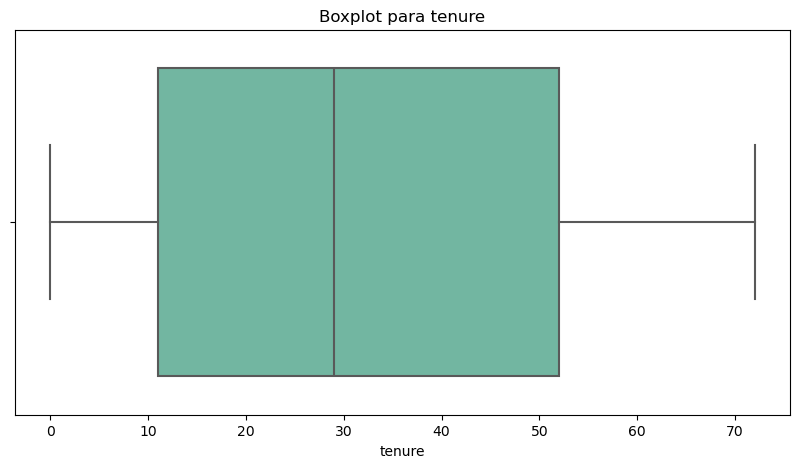

C:\Users\Pillud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


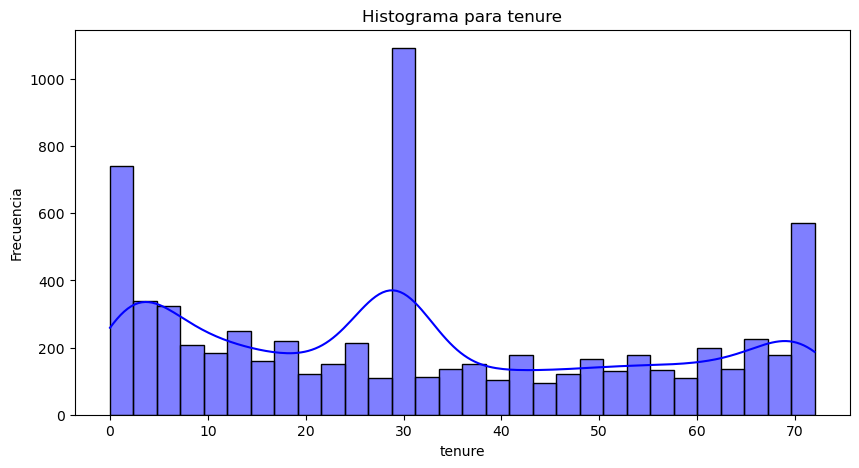

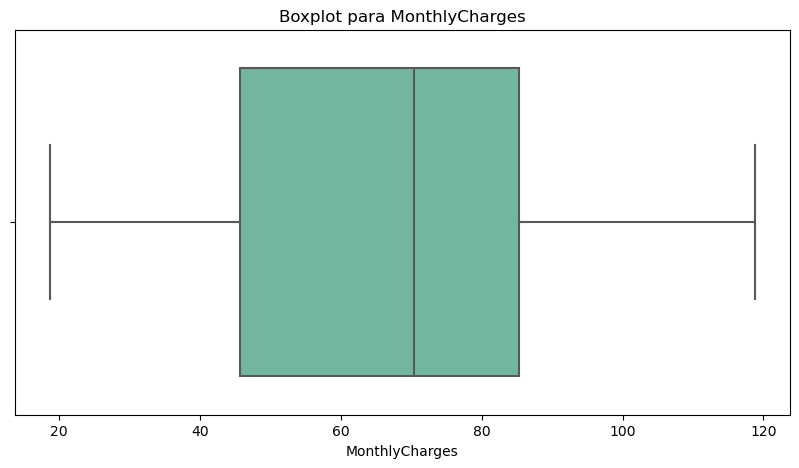

C:\Users\Pillud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


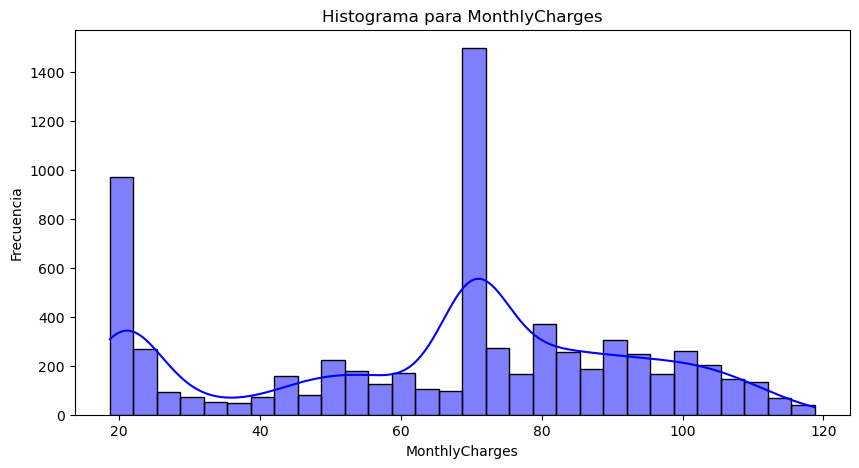

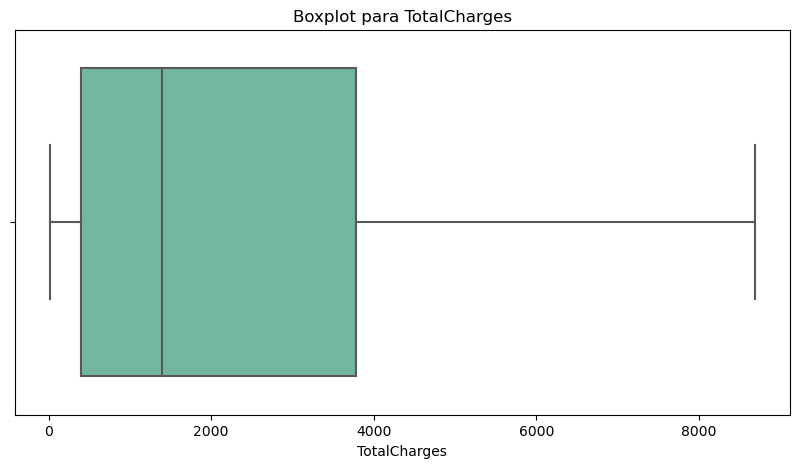

C:\Users\Pillud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


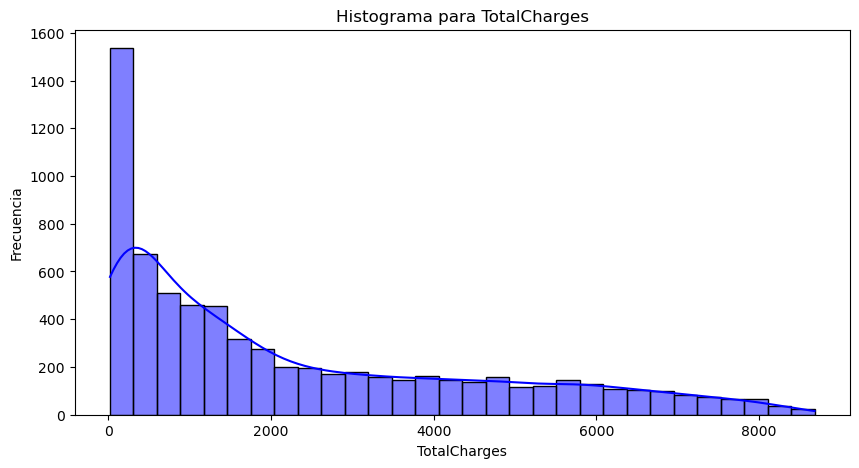


Outliers detectados en tenure:
  Límite inferior: -50.50, Límite superior: 113.50
  Total de outliers: 0

Outliers detectados en MonthlyCharges:
  Límite inferior: -13.77, Límite superior: 144.82
  Total de outliers: 0

Outliers detectados en TotalCharges:
  Límite inferior: -4683.52, Límite superior: 8868.67
  Total de outliers: 0


In [26]:
# Seleccionar columnas numéricas continuas
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']

# Mostrar estadísticas descriptivas para las variables numéricas
print("Estadísticas descriptivas de las variables numéricas continuas:")
print(customers_df[numerical_cols].describe())

# Detectar y visualizar outliers con boxplots
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=customers_df[col], palette="Set2")
    plt.title(f"Boxplot para {col}")
    plt.xlabel(col)
    plt.show()

    # Mostrar histograma para ver la distribución
    plt.figure(figsize=(10, 5))
    sns.histplot(customers_df[col], kde=True, color="blue", bins=30)
    plt.title(f"Histograma para {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Identificar valores atípicos según el rango intercuartílico (IQR)
def detectar_outliers(customers_df, columnas):
    outliers = {}
    for col in columnas:
        Q1 = customers_df[col].quantile(0.25)  # Primer cuartil
        Q3 = customers_df[col].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                # Rango intercuartílico
        lim_inferior = Q1 - 1.5 * IQR
        lim_superior = Q3 + 1.5 * IQR

        # Detectar filas que están fuera del rango
        outliers[col] = customers_df[(customers_df[col] < lim_inferior) | (customers_df[col] > lim_superior)][col]

        print(f"\nOutliers detectados en {col}:")
        print(f"  Límite inferior: {lim_inferior:.2f}, Límite superior: {lim_superior:.2f}")
        print(f"  Total de outliers: {len(outliers[col])}")

    return outliers

# Detectar outliers
outliers_detectados = detectar_outliers(customers_df, numerical_cols)

# NO ENCONTRAMOS OUTLIERS DENTRO DE LOS CAMPOS NUMERICOS `CONTINUOS`

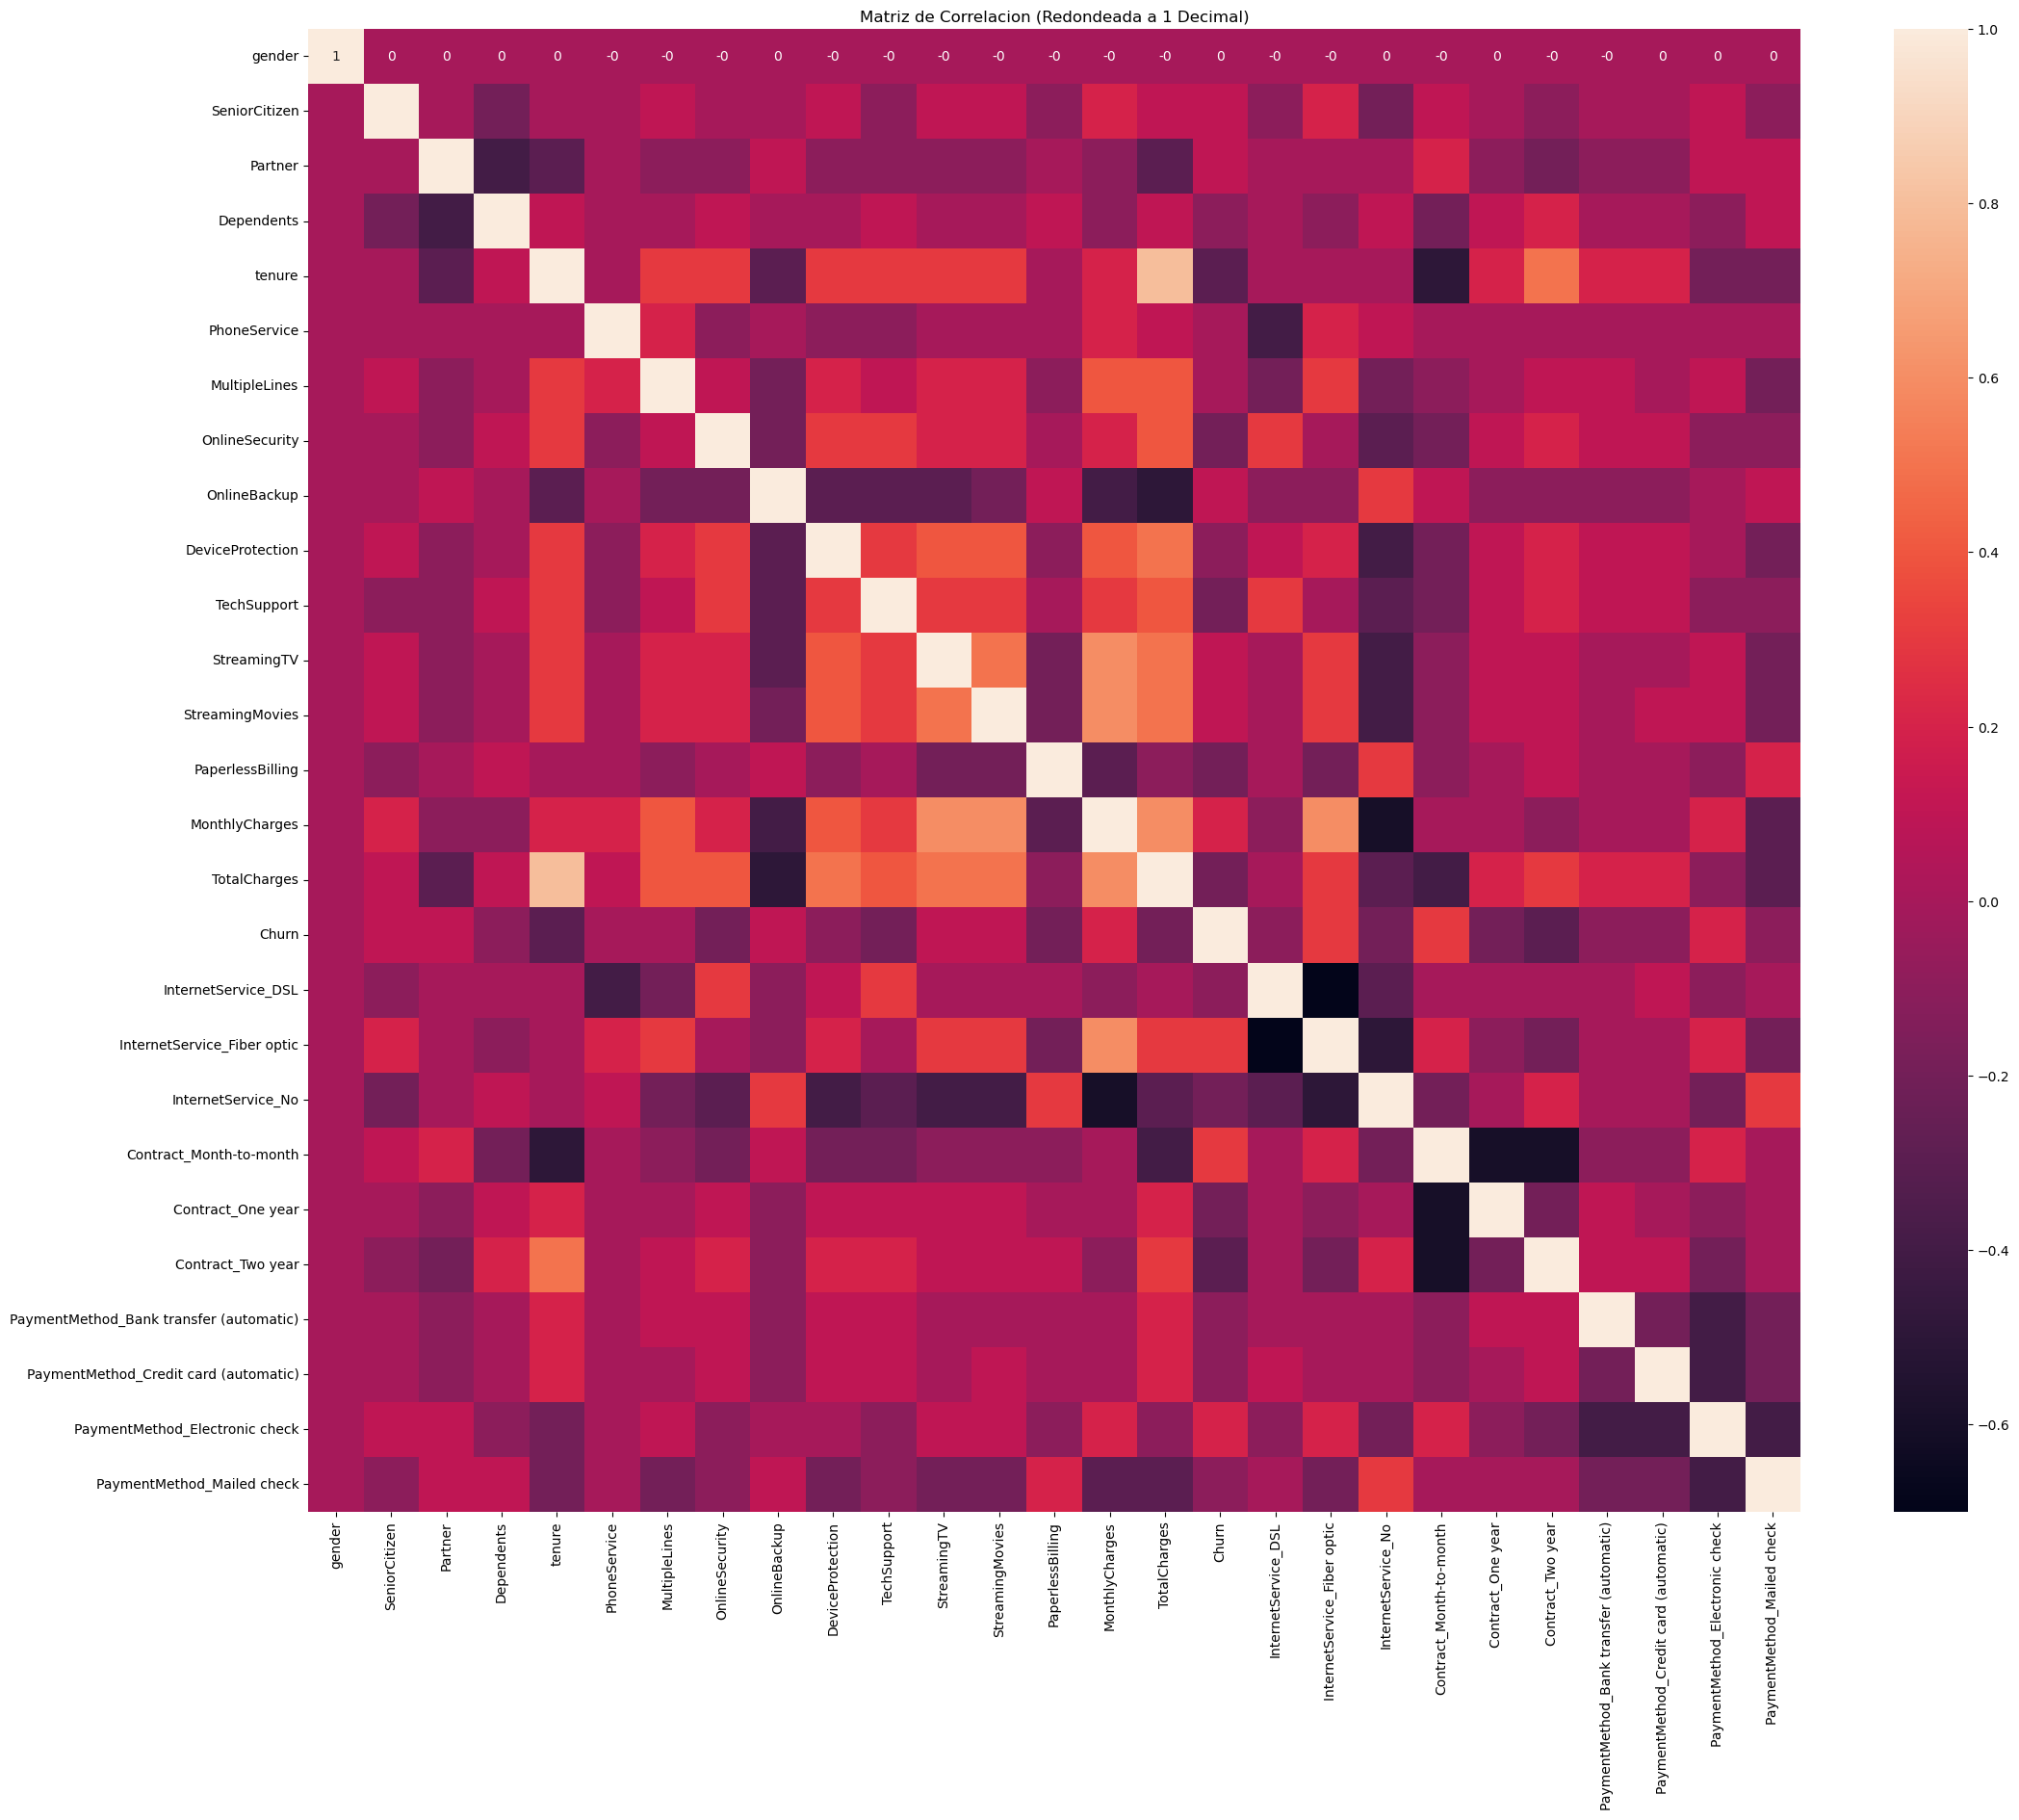

In [27]:
#GENERAMOS LA MATRIZ DE CORRELACIONES
corr_matrix = customers_df.corr()
corr_matrix_redondeada = corr_matrix.round(1)
#print(corr_matrix_redondeada)
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix_redondeada, annot=True)
plt.title("Matriz de Correlacion (Redondeada a 1 Decimal)")
plt.show()

In [28]:
# No se encuentra una correlacion entre las features, eseptuando a las dummies creadas por feature, las cuales siguen un correlacion entre ellas

### BUSCAMOS RELACION ENTRE LAS FEATURES Y CHURN

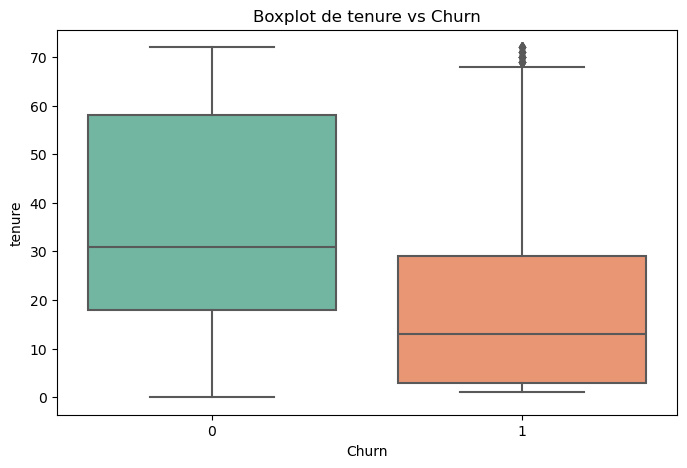

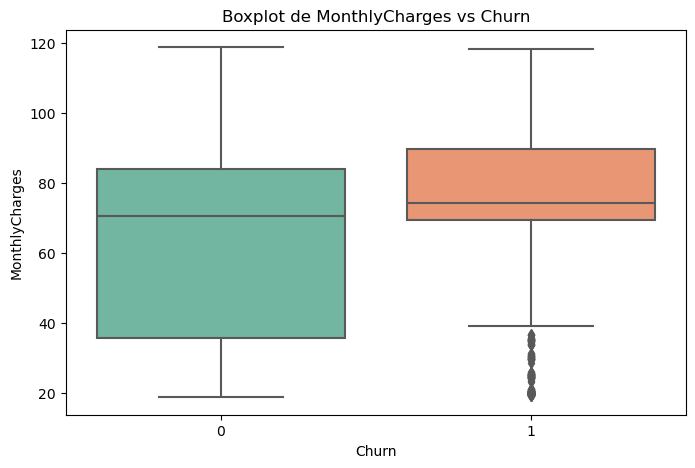

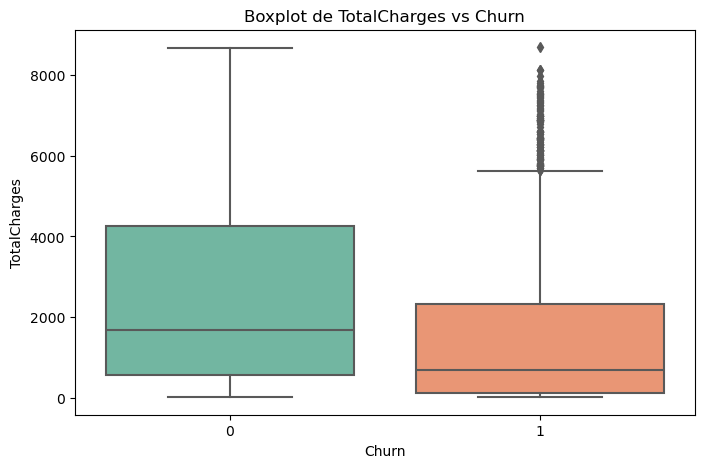

C:\Users\Pillud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


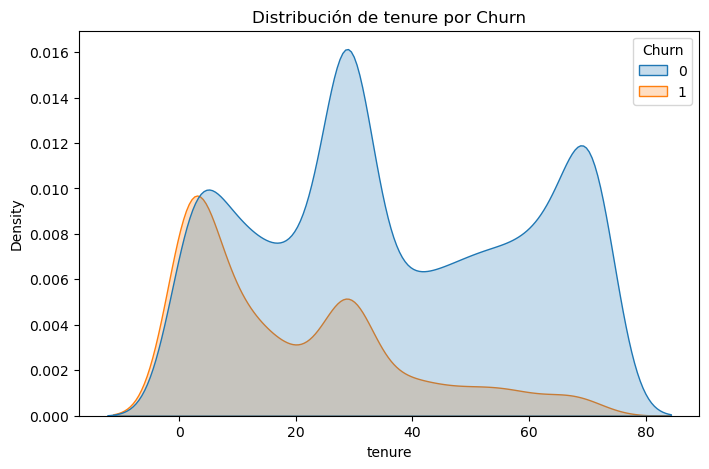

C:\Users\Pillud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


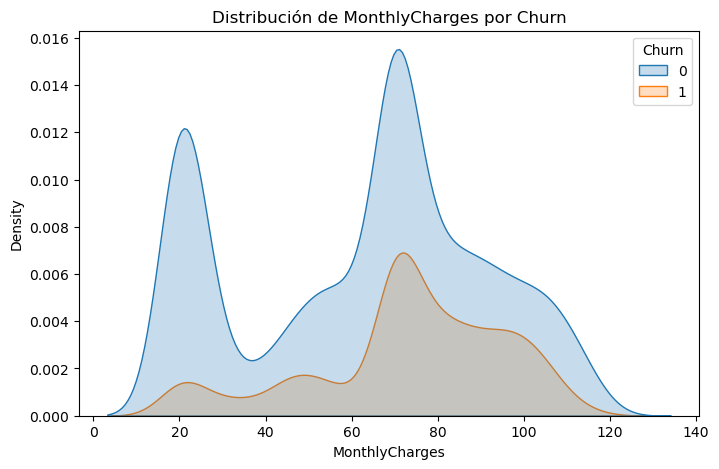

C:\Users\Pillud\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


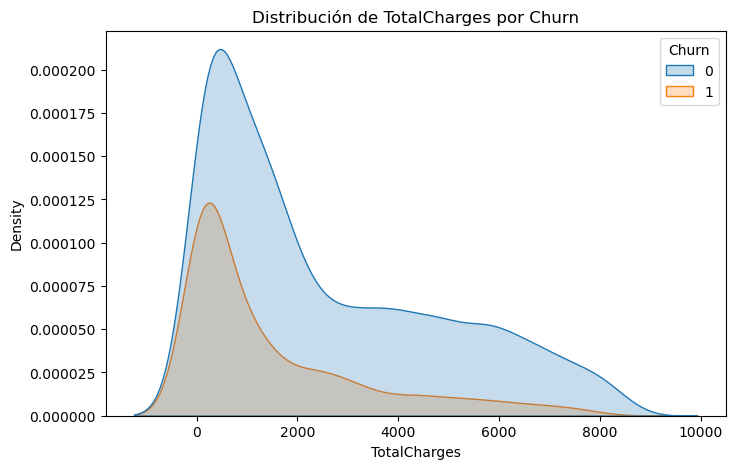

In [29]:
# Variables numéricas
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

x = customers_df.copy() # Creo una copia para no modificar el DF original

# Boxplots para comparar distribuciones
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=customers_df['Churn'], y=customers_df[col], palette="Set2")
    plt.title(f"Boxplot de {col} vs Churn")
    plt.show()

# Densidad (KDE) para ver diferencias en distribuciones
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=customers_df, x=col, hue='Churn', fill=True)
    plt.title(f"Distribución de {col} por Churn")
    plt.show()

### Los clientes con mayor permanencia(tenure) y mayor gasto total(TotalCharges) tienden a ser menos propensos a abandonar, mientras que los cargos mensuales mas altos podrian estar asociados con una mayor probabilidad de abandono.
### Tambien hay un churn temprano, con una mediana para clientes con tenure entre 10 y 20

<Figure size 800x500 with 0 Axes>

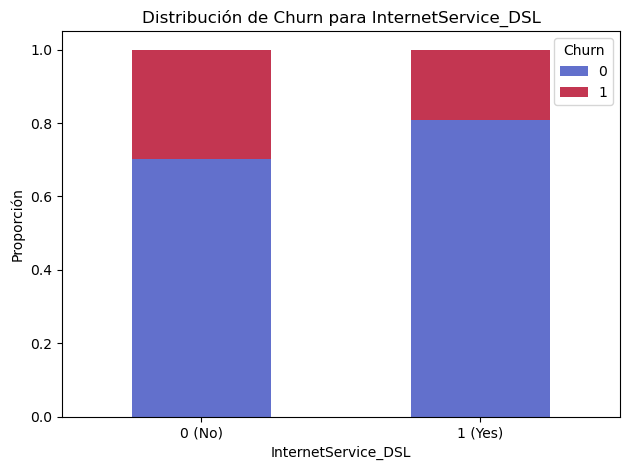

<Figure size 800x500 with 0 Axes>

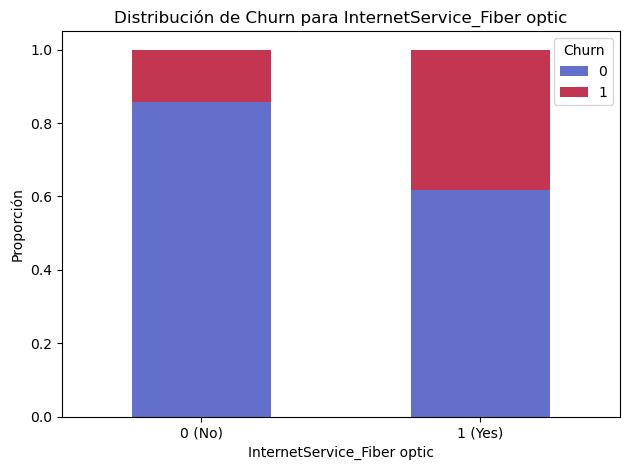

<Figure size 800x500 with 0 Axes>

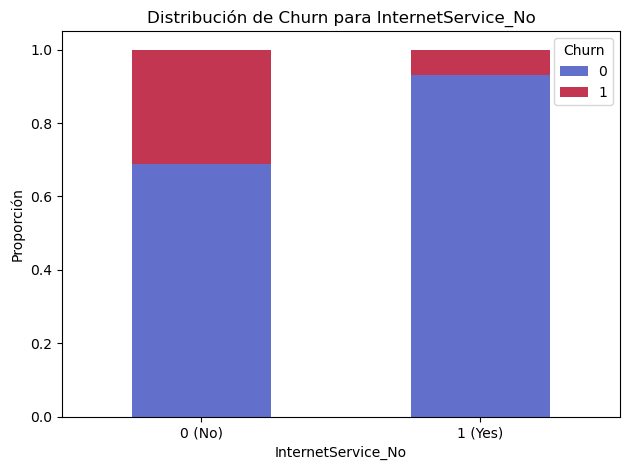

<Figure size 800x500 with 0 Axes>

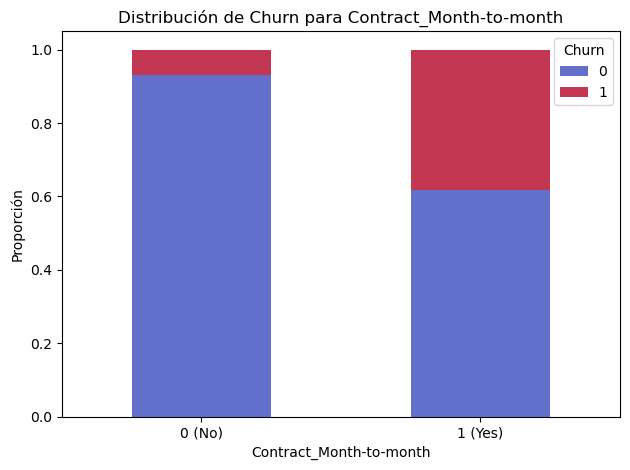

<Figure size 800x500 with 0 Axes>

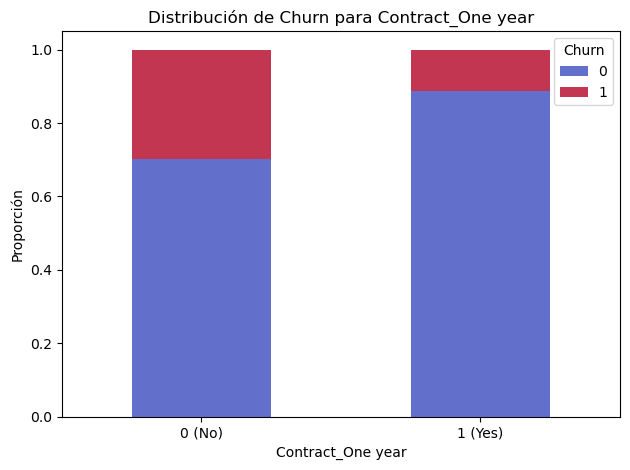

<Figure size 800x500 with 0 Axes>

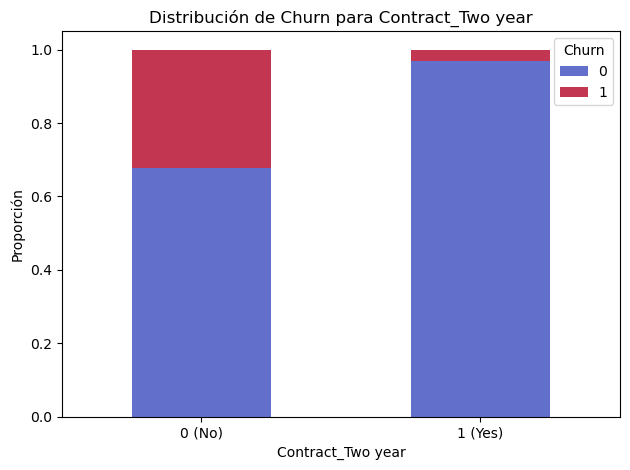

<Figure size 800x500 with 0 Axes>

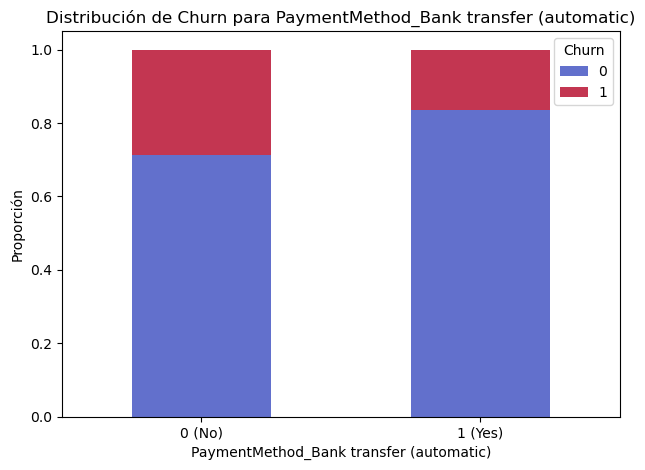

<Figure size 800x500 with 0 Axes>

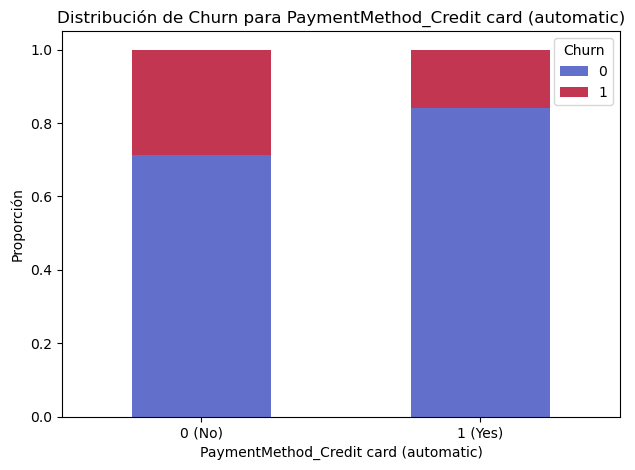

<Figure size 800x500 with 0 Axes>

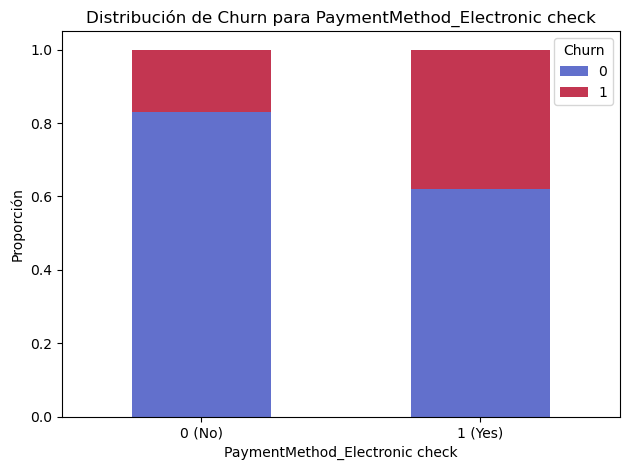

<Figure size 800x500 with 0 Axes>

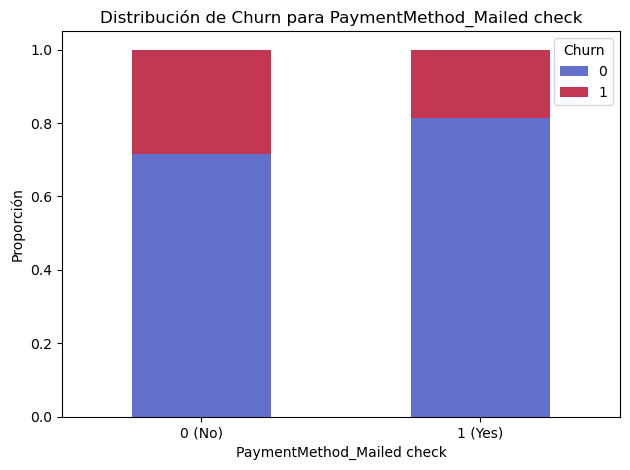

In [30]:
dummy_cols = [
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]

for col in dummy_cols:
    plt.figure(figsize=(8, 5))

    # Calcular la proporcion de Churn para cada categoria de las variables dummy
    prop_churn = customers_df.groupby(col)['Churn'].value_counts(normalize=True).unstack()

    # Graficar proporciones
    prop_churn.plot(kind='bar', stacked=True, colormap='coolwarm', alpha=0.8)
    plt.title(f"Distribución de Churn para {col}")
    plt.xlabel(col)
    plt.ylabel("Proporción")
    plt.legend(title="Churn")
    plt.xticks(ticks=[0, 1], labels=['0 (No)', '1 (Yes)'], rotation=0)
    plt.tight_layout()
    plt.show()

### VEMOS QUE PARA LOS CAMPOS:
InternetService_Fiber optic = 1
Contract_Month-to-month = 1
PaymentMethod_Electronic check = 1
### APROXIMADAMENTE EL 40% EN CADA UNO SE GENERA CHURN
Vamos a verificar si simultaneamente hay alguna relacion

In [31]:
# Filtrar clientes que cumplen las tres condiciones
filtered_customers = customers_df[
    (customers_df['InternetService_Fiber optic'] == 1) &
    (customers_df['Contract_Month-to-month'] == 1) &
    (customers_df['PaymentMethod_Electronic check'] == 1)
]

# Calcular el total de clientes en este grupo
total_filtered = filtered_customers.shape[0]

# Calcular cuántos de estos tienen Churn = Yes
churn_filtered = filtered_customers[filtered_customers['Churn'] == 'Yes'].shape[0]

# Porcentaje de Churn en este grupo
churn_percentage = (churn_filtered / total_filtered) * 100 if total_filtered > 0 else 0

# Mostrar resultados
print(f"Total de clientes que cumplen las condiciones: {total_filtered}")
print(f"Clientes con Churn = Yes: {churn_filtered}")
print(f"Porcentaje de Churn en este grupo: {churn_percentage:.2f}%")

Total de clientes que cumplen las condiciones: 1652
Clientes con Churn = Yes: 0
Porcentaje de Churn en este grupo: 0.00%


El resultado indica que ninguno de los clientes que tienen estas características simultaneamente ha abandonado el servicio (Churn = Yes). Esto  sugiere que esta combinacion podría estar asociada con una alta retencion de clientes.

### EXPORT DEL DF YA PROCESADO

In [32]:
#ruta_archivo = '/content/drive/My Drive/CS Datos Grupo 9/telco_churn_EDA.csv'
#customers_df.to_csv(ruta_archivo, index=False) #El argumento index=False evita que se guarde el índice del DataFrame en el archivo CSV.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc,confusion_matrix, ConfusionMatrixDisplay

In [34]:
X = customers_df.drop('Churn', axis=1)  #todas las columnas excepto 'Churn'
y = customers_df['Churn']  # Objetivo: 'Churn'

In [35]:
# dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
# Escalado de variables

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)


Text(0.5, 1.0, 'Standarized test data')

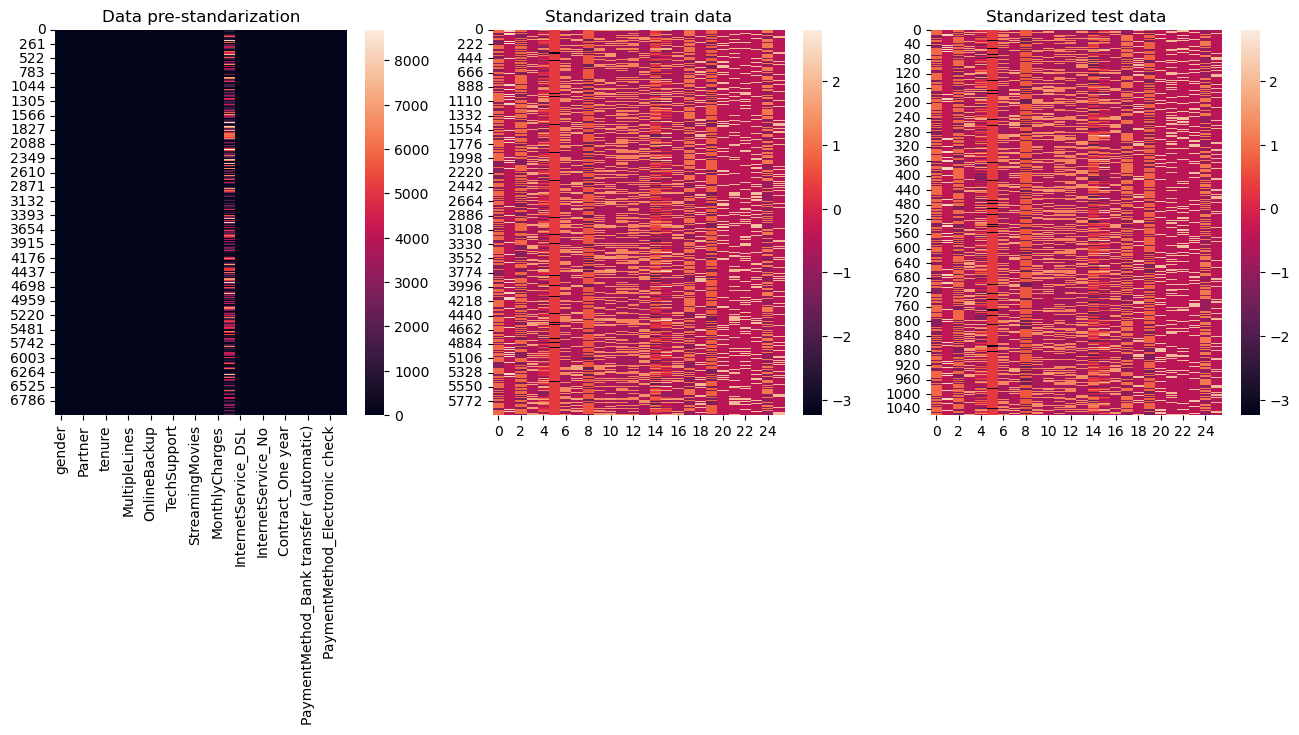

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(X, ax = axs[0])
sns.heatmap(X_train_scal, ax = axs[1])
sns.heatmap(X_test_scal, ax = axs[2])
axs[0].set_title('Data pre-standarization')
axs[1].set_title('Standarized train data')
axs[2].set_title('Standarized test data')

In [39]:
# Creo el grid search con unos hiperparametros arbitrarios. Además hago 5 crossvalidation
param_grid = {'C': [0.1,1,5 ]}
clf_LR = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=1, n_jobs=-1)

In [40]:
# fiteamos el dataset con el modelo
clf_LR.fit(X_train_scal, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 5]}, verbose=1)

In [41]:
# Vemos cual fue el mejor parametro para C
print("The best parameter is %s with a score of %0.2f" % (clf_LR.best_params_, clf_LR.best_score_))

The best parameter is {'C': 1} with a score of 0.79


In [42]:
#hacemos las predicciones
y_pred_LR = clf_LR.predict(X_test_scal)  # Predecir en los datos de prueba

In [43]:
#evaluamos el modelo
accuracy = accuracy_score(y_test, y_pred_LR)  # calcula la precision
print(f"Precisión: {accuracy}")
print(classification_report(y_test, y_pred_LR))  # muestra el informe de clasificacion

Precisión: 0.8070009460737938
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       775
           1       0.66      0.56      0.61       282

    accuracy                           0.81      1057
   macro avg       0.76      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057



In [44]:
#compute and plot AUC
y_proba = clf_LR.predict_proba(X_test_scal)
fpr1, tpr1, thresholds = roc_curve(y_test.astype('int'), y_proba[:,1], drop_intermediate = False)
auc_LR = metrics.auc(fpr1, tpr1)
print("El AUC con Regression Lineal  es = " + str(auc_LR))

El AUC con Regression Lineal  es = 0.8482246625486158


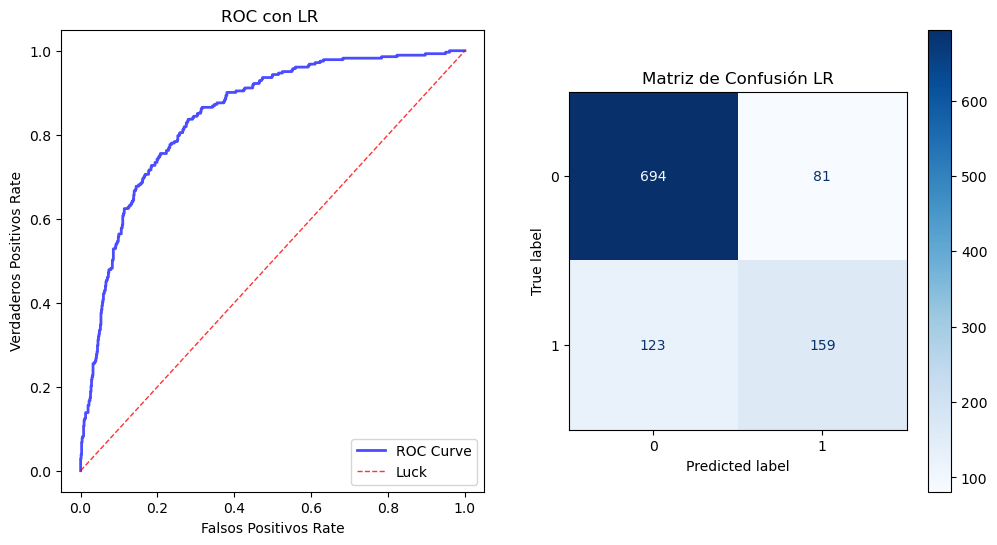

In [45]:
# Crear la figura y los subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: ROC Curve
axes[0].plot(fpr1, tpr1, lw=2, alpha=0.7, label='ROC Curve', color='b')
axes[0].plot([0,1], [0,1], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
axes[0].set_xlabel('Falsos Positivos Rate')
axes[0].set_ylabel('Verdaderos Positivos Rate')
axes[0].grid(False)
axes[0].legend(loc="lower right")
axes[0].set_title('ROC con LR ')

# Gráfico 2: Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_LR.best_estimator_.classes_)
disp.plot(cmap='Blues', ax=axes[1])  # Usar el segundo eje para el gráfico
axes[1].set_title("Matriz de Confusión LR")

plt.show()

In [46]:
# cantidad de componentes a extraer
n_comps = 10
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca_LR = pca.fit_transform(X_train_scal)
xpca_test_LR = pca.fit_transform(X_test_scal)
# obtenemos los auto-valores
eigenvalues_LR = pca.explained_variance_ratio_

<Axes: >

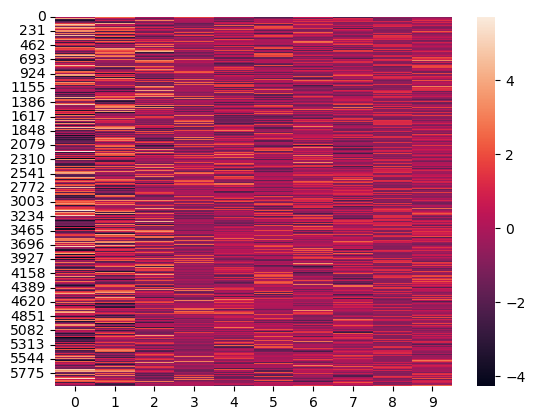

In [47]:
sns.heatmap(xpca_LR)

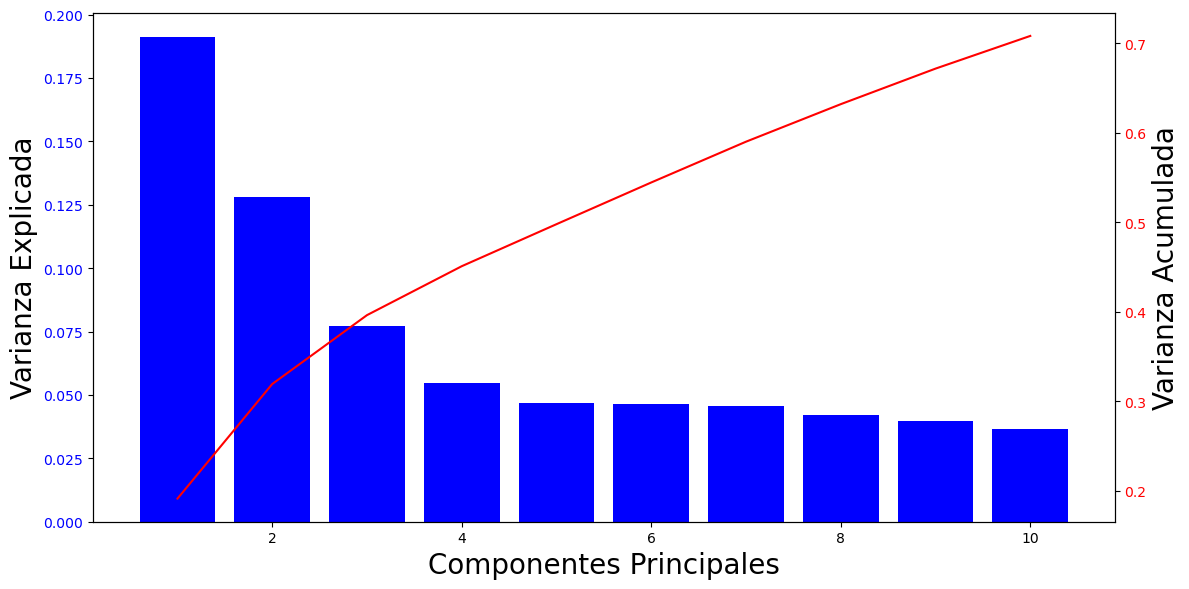

In [48]:
# Graficamos
components = range(1,n_comps + 1)

eigenvalues_acum = pca.explained_variance_ratio_.cumsum()

# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues_LR, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20)
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

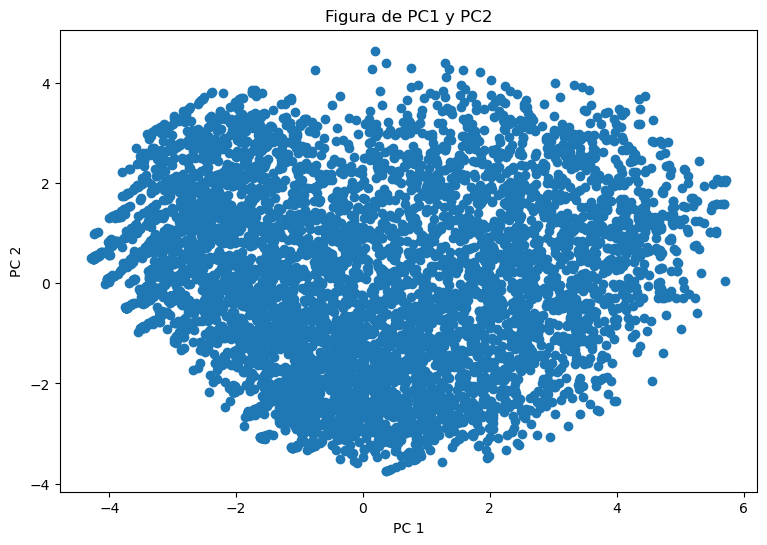

In [49]:
# Visualizo con las dos variables con mas varianza
plt.figure(figsize=(9,6))
plt.scatter((pd.DataFrame(xpca_LR)).iloc[:,0],(pd.DataFrame(xpca_LR)).iloc[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Figura de PC1 y PC2')
plt.show()

In [50]:
#entrenamos y evaluamos el modelo con PCA
clf_LR_pca = LogisticRegression(C = clf_LR.best_params_['C'])
clf_LR_pca.fit(xpca_LR, y_train)# Ajusta el modelo con PCA a los datos de entrenamiento
y_pred_pca = clf_LR_pca.predict(xpca_test_LR)  # Predece en los datos de prueba
accuracy_pca = accuracy_score(y_test, y_pred_pca)  # Calcula la precision con PCA
print(f"Precision con PCA: {accuracy_pca}")
print(classification_report(y_test, y_pred_pca))  # Mostrar informe de clasificacion con PCA

Precision con PCA: 0.7776726584673604
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       775
           1       0.60      0.48      0.54       282

    accuracy                           0.78      1057
   macro avg       0.71      0.68      0.70      1057
weighted avg       0.77      0.78      0.77      1057



In [51]:
y_proba_pca = clf_LR_pca.predict_proba(xpca_test_LR)
fpr2, tpr2, thresholds = roc_curve(y_test.astype('int'), y_proba_pca[:,1], drop_intermediate = False)
auc_LR = metrics.auc(fpr2, tpr2)
print("El AUC con Regression Lineal  es = " + str(auc_LR))

El AUC con Regression Lineal  es = 0.8241523678792038


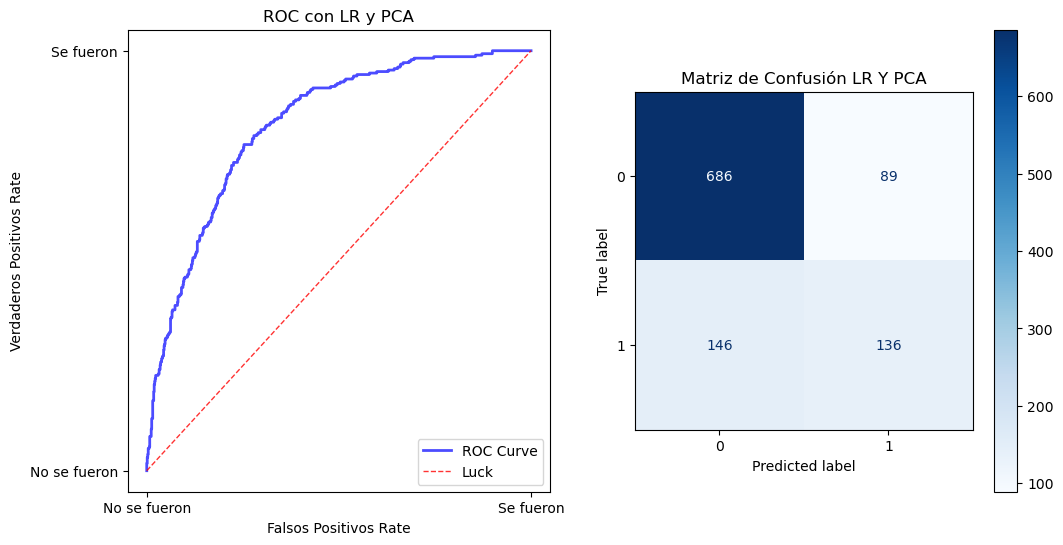

In [52]:
# Crear la figura y los subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: ROC Curve
axes[0].plot(fpr2, tpr2, lw=2, alpha=0.7, label='ROC Curve', color='b')
axes[0].plot(["No se fueron", "Se fueron"], ["No se fueron", "Se fueron"], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
axes[0].set_xlabel('Falsos Positivos Rate')
axes[0].set_ylabel('Verdaderos Positivos Rate')
axes[0].grid(False)
axes[0].legend(loc="lower right")
axes[0].set_title('ROC con LR y PCA')

# Gráfico 2: Matriz de Confusión
cm2 = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf_LR_pca.classes_)
disp.plot(cmap='Blues', ax=axes[1])  # Usar el segundo eje para el gráfico
axes[1].set_title("Matriz de Confusión LR Y PCA")

plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
#Hacemos un Pipeline con RF
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [54]:
#Entrenamos y evaluamos con RF
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión con Random Forest: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Precisión con Random Forest: 0.7928098391674551
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       775
           1       0.65      0.49      0.56       282

    accuracy                           0.79      1057
   macro avg       0.74      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057



In [55]:
#PCA para RF
pipeline_pca_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [56]:
#Entrenamos y evaluamos el RF con PCA
pipeline_pca_rf.fit(X_train, y_train)
y_pred_pca_rf = pipeline_pca_rf.predict(X_test)
accuracy_pca_rf = accuracy_score(y_test, y_pred_pca_rf)
print(f"Precisión con Random Forest y PCA: {accuracy_pca_rf}")
print(classification_report(y_test, y_pred_pca_rf))

Precisión con Random Forest y PCA: 0.7814569536423841
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       775
           1       0.62      0.47      0.53       282

    accuracy                           0.78      1057
   macro avg       0.72      0.68      0.70      1057
weighted avg       0.77      0.78      0.77      1057



In [57]:
#SUPER VECTOR MACHINE
# Hyperparametros
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 20, 100],
              'gamma':[0.1,1, 10]}
#
clf_SVM = GridSearchCV(svm.SVC(probability= True), param_grid = parameters, refit = True, cv = 3, verbose=2)

clf_SVM.fit(X_train_scal, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   2.1s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   1.9s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.5s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   2.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   1.9s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ...........................C=1, gamma=1

GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 20, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             verbose=2)

In [58]:
print("The best parameters are %s with a score of %0.2f" % (clf_SVM.best_params_, clf_SVM.best_score_))


The best parameters are {'C': 10, 'gamma': 0.1, 'kernel': 'linear'} with a score of 0.79


In [59]:
#Evaluamos
y_pred_SVM = clf_SVM.predict(X_test_scal)
accuracy_svm = accuracy_score(y_test, y_pred_SVM)
print(f"Precision con SVM: {accuracy_svm}")
print(classification_report(y_test,y_pred_SVM ))

Precision con SVM: 0.8221381267738883
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       775
           1       0.69      0.60      0.64       282

    accuracy                           0.82      1057
   macro avg       0.78      0.75      0.76      1057
weighted avg       0.82      0.82      0.82      1057



In [61]:
y_proba_SVM = clf_SVM.predict_proba(X_test_scal)
fpr3, tpr3, thresholds = roc_curve(y_test.astype('int'), y_proba_SVM[:,1], drop_intermediate = False)
auc_SVM= metrics.auc(fpr3, tpr3)
print("El AUC con SVM  es = " + str(auc_SVM))

El AUC con SVM  es = 0.8398787462823152


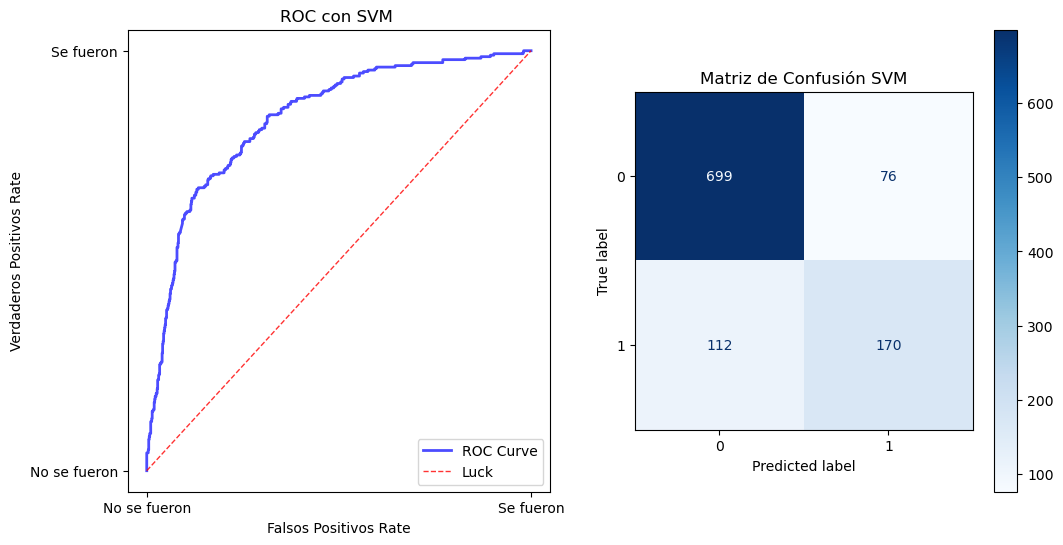

In [62]:
# Crear la figura y los subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: ROC Curve
axes[0].plot(fpr3, tpr3, lw=2, alpha=0.7, label='ROC Curve', color='b')
axes[0].plot(["No se fueron", "Se fueron"], ["No se fueron", "Se fueron"], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
axes[0].set_xlabel('Falsos Positivos Rate')
axes[0].set_ylabel('Verdaderos Positivos Rate')
axes[0].grid(False)
axes[0].legend(loc="lower right")
axes[0].set_title('ROC con SVM ')

# Gráfico 2: Matriz de Confusión
cm3 = confusion_matrix(y_test, y_pred_SVM)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=clf_SVM.classes_)
disp.plot(cmap='Blues', ax=axes[1])  # Usar el segundo eje para el gráfico
axes[1].set_title("Matriz de Confusión SVM")

plt.show()

In [63]:
#ahora con PCA
clf_SVM_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('classifier', svm.SVC(C = clf_SVM.best_params_['C'],kernel = clf_SVM.best_params_['kernel'], gamma = clf_SVM.best_params_['gamma'], probability = True, random_state=42))
])

clf_SVM_pca.fit(X_train, y_train)
y_pred_pca_svm = clf_SVM_pca.predict(X_test)
accuracy_pca_svm = accuracy_score(y_test, y_pred_pca_svm)
print(f"Precision con SVM y PCA: {accuracy_pca_svm}")
print(classification_report(y_test, y_pred_pca_svm))

Precision con SVM y PCA: 0.7899716177861873
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       775
           1       0.63      0.51      0.56       282

    accuracy                           0.79      1057
   macro avg       0.73      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057



In [64]:
y_proba_SVM = clf_SVM_pca.predict_proba(X_test_scal)
fpr4, tpr4, thresholds = roc_curve(y_test.astype('int'), y_proba_SVM[:,1], drop_intermediate = False)
auc_SVM_pca= metrics.auc(fpr4, tpr4)
print("El AUC con SVM y PCA es = " + str(auc_SVM_pca))

El AUC con SVM y PCA es = 0.8138160603980783


C:\Users\Pillud\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


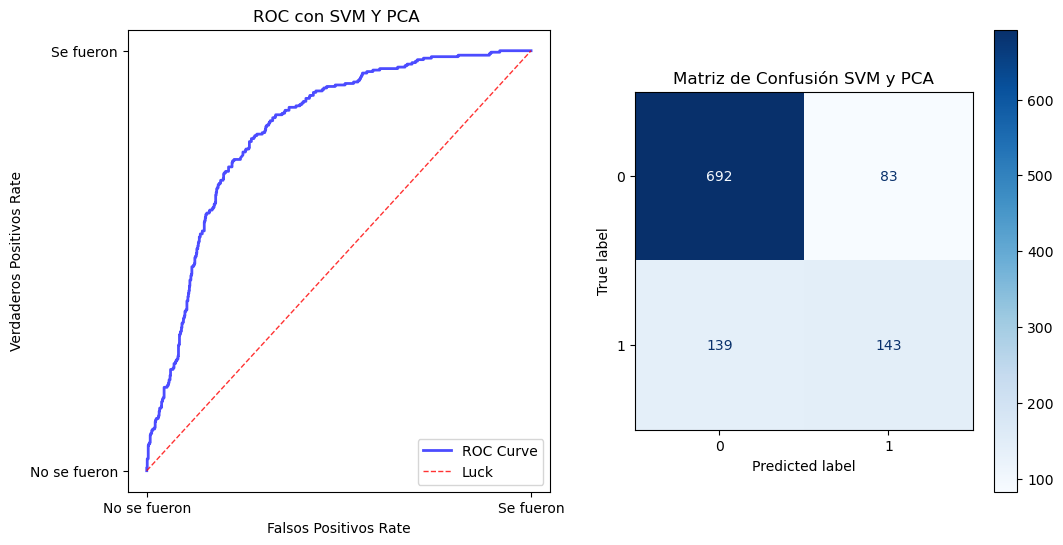

In [65]:
# Crear la figura y los subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: ROC Curve
axes[0].plot(fpr4, tpr4, lw=2, alpha=0.7, label='ROC Curve', color='b')
axes[0].plot(["No se fueron", "Se fueron"], ["No se fueron", "Se fueron"], linestyle='--', lw=1, color='r', label='Luck', alpha=.8)
axes[0].set_xlabel('Falsos Positivos Rate')
axes[0].set_ylabel('Verdaderos Positivos Rate')
axes[0].grid(False)
axes[0].legend(loc="lower right")
axes[0].set_title('ROC con SVM Y PCA ')

# Gráfico 2: Matriz de Confusión
cm4 = confusion_matrix(y_test, y_pred_pca_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=clf_SVM.classes_)
disp.plot(cmap='Blues', ax=axes[1])  # Usar el segundo eje para el gráfico
axes[1].set_title("Matriz de Confusión SVM y PCA")

plt.show()

In [66]:
#Creamos un DF para guardar los resultados
resultados = pd.DataFrame(columns=['Modelo', 'Precision', 'Precision con PCA'])

In [67]:
#agregamos los resultados de cada modelo al DF
resultados.loc[len(resultados)] = ['Regresion Logistica', accuracy, accuracy_pca]
resultados.loc[len(resultados)] = ['Random Forest', accuracy_rf, accuracy_pca_rf]
resultados.loc[len(resultados)] = ['SVM', accuracy_svm, accuracy_pca_svm]

In [68]:
#mostramos los resultados
print(resultados)

                Modelo  Precision  Precision con PCA
0  Regresion Logistica   0.807001           0.777673
1        Random Forest   0.792810           0.781457
2                  SVM   0.822138           0.789972
